# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [1]:
%matplotlib inline
import pandas as pd

filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

# We need to process the dates to be datetime variables
data["sale_date"] = pd.to_datetime(data["sale_date"])

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with seaborn until you understand each one.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255A1A06BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000255A1DF19E8>]], dtype=object)

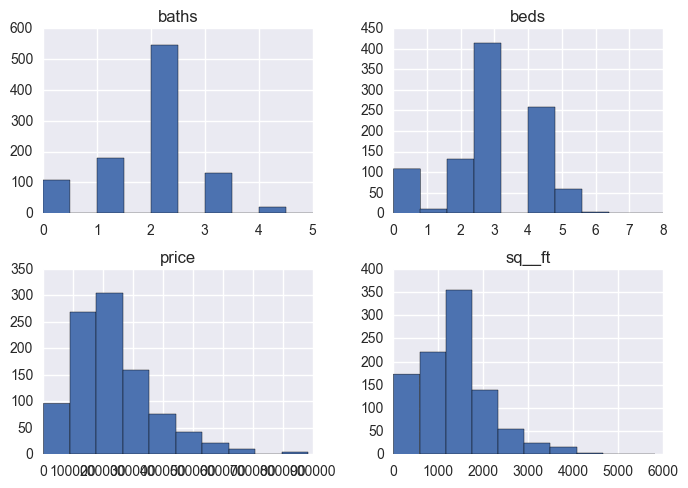

In [42]:
import matplotlib.pyplot as plt


data[["beds", "baths", "price", "sq__ft"]].hist()

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

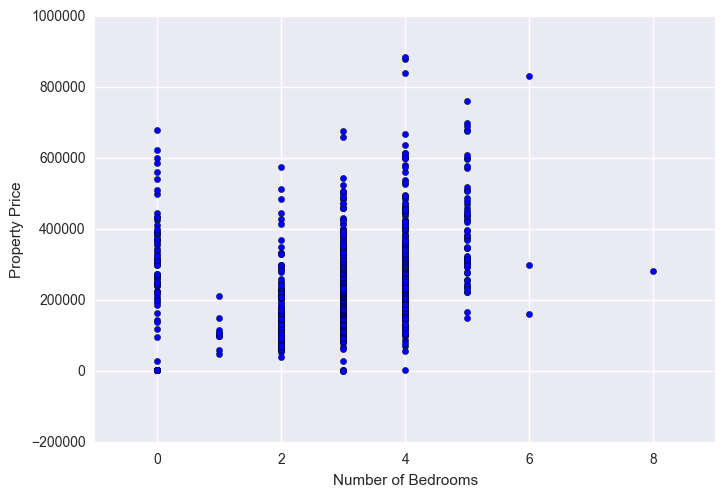

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['beds']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Property Price")
plt.show()

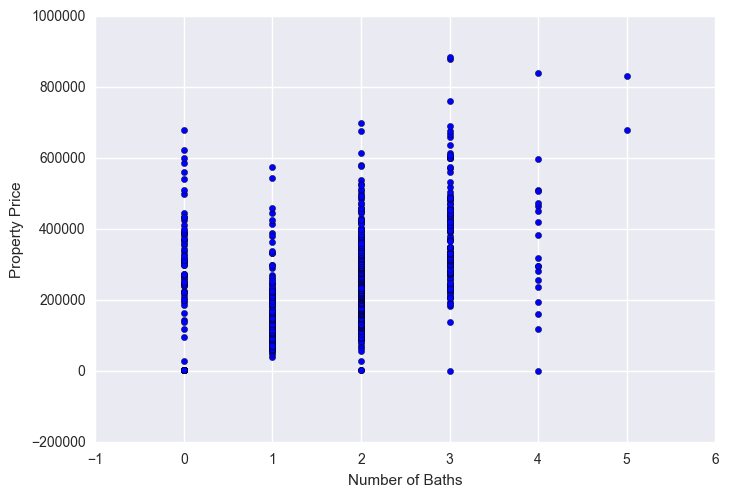

In [44]:
x = data['baths']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Number of Baths")
plt.ylabel("Property Price")
plt.show()

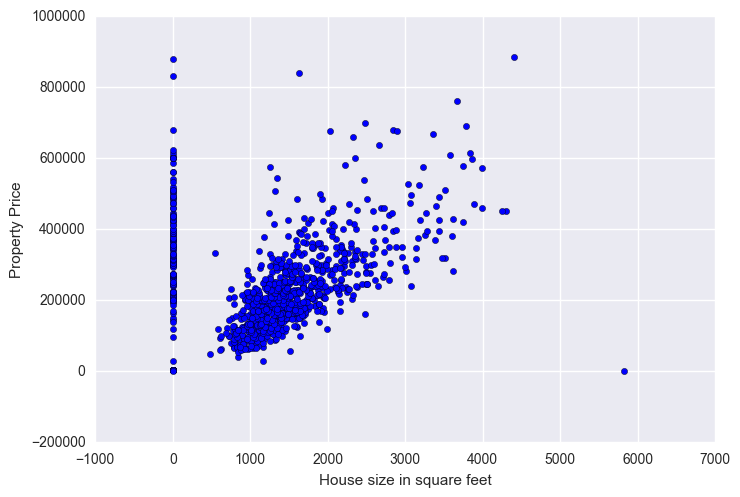

In [45]:
x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("House size in square feet")
plt.ylabel("Property Price")
plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

In [46]:
import statsmodels.api as sm
targets = pd.DataFrame(data, columns=["price"])
X = data["baths"]
y = targets["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     2903.
Date:                Tue, 13 Dec 2016   Prob (F-statistic):          8.60e-296
Time:                        09:14:05   Log-Likelihood:                -13047.
No. Observations:                 985   AIC:                         2.610e+04
Df Residuals:                     984   BIC:                         2.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
baths       1.181e+05   2192.600     53.879      0.000      1.14e+05  1.22e+05
==============================================================================
Omnibus:                      254.722   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.726
Skew:                           1.341   Prob(JB):                    1.50e-143
Kurtosis:                       5.972   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

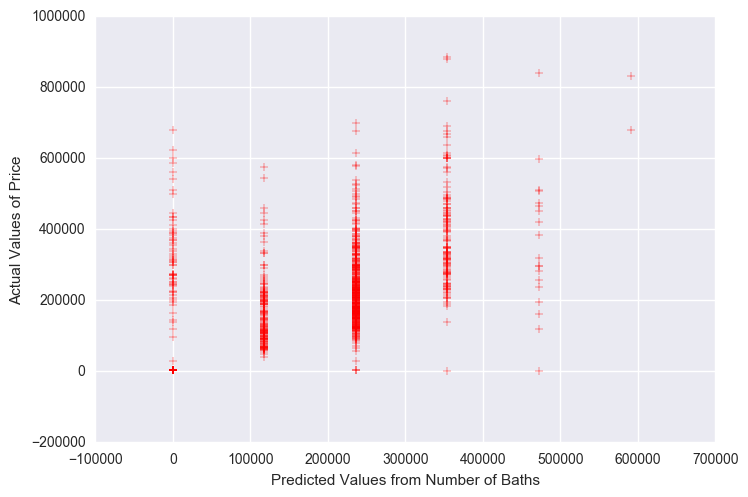

MSE: 5.44001883973e+13


In [47]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Number of Baths")
plt.ylabel("Actual Values of Price")
plt.show()
print ("MSE:", model.mse_model)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

'this is some comment\nassdfn adf adsf;l\n'